In [1]:
import numpy as np
import scipy.stats as st 
import scipy.special as sp
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, art3d, proj3d
from matplotlib.text import TextPath
from matplotlib.patches import FancyArrowPatch, Circle, PathPatch, Wedge, Rectangle
from matplotlib import patches
from matplotlib.transforms import Affine2D

In [11]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)
        
def sizescale_init(f):
    f.SIZESCALE = 1.
    return f

@sizescale_init        
def text3d(ax, xyz, s,color, alpha=1,  zdir="z", size=1, angle=0, usetex=False, **kwargs):
    x, y, z = xyz
    if zdir == "y":
        xy1, z1 = (x, z), y
    elif zdir == "y":
        xy1, z1 = (y, z), x
    else:
        xy1, z1 = (x, y), z

    text_path = TextPath((0, 0), s, size=size*text3d.SIZESCALE, usetex=usetex)
    trans = Affine2D().rotate(angle).translate(*xy1)
    p1 = PathPatch(trans.transform_path(text_path), color=color, alpha=alpha)
    ax.add_patch(p1)
    art3d.pathpatch_2d_to_3d(p1, z=z1, zdir=zdir)

In [12]:
# def draw_projection(x,y,z, ax, linewidth=2, style_color = '--b'):
#     # projections on surfaces
#     endpoints = [([x, x],[y, y],[z, 0])]
#     endpoints.append(([x, x],[y, 0],[0, 0]))
#     endpoints.append(([x, 0],[y, y],[0, 0]))
#     endpoints.append(([x, 0],[y, 0],[z, z]))
#     endpoints.append(([x, 0],[y, 0],[0, 0]))
    
#     for endpoint in endpoints:
#         ax.plot(endpoint[0],endpoint[1],endpoint[2], style_color, linewidth=linewidth)
    
#     ax.scatter([x,0,0,x],[0,y,0,y],[0,0,z,0],color=style_color[-1])
    
    
# def draw_axis(r,z, ax,margin):
#     #ploting the axis x,y, z
#     x_axis = Arrow3D([0, r*(1+margin)], [0, 0],[0, 0], mutation_scale=10, lw=1, arrowstyle="-|>", color="k")
#     y_axis = Arrow3D([0, 0], [0, r*(1+margin)],[0, 0], mutation_scale=10, lw=1, arrowstyle="-|>", color="k")
#     z_axis = Arrow3D([0, 0], [0, 0],[0, z*(1+margin)], mutation_scale=10, lw=1, arrowstyle="-|>", color="k")
#     ax.add_artist(x_axis)
#     ax.add_artist(y_axis)
#     ax.add_artist(z_axis)
    
    
# def draw_basis(x,y,z,t, ax):
#     # basis vectors on origin
    
#     limx = ax.get_xlim()
#     limz = ax.get_zlim()
#     _len = min(limx[1],limx[1])
    
#     e_i = Arrow3D([0,1],[0,0],[0,0], mutation_scale=10, lw=2, arrowstyle="-|>", color="purple")
#     e_j = Arrow3D([0,0],[0,1],[0,0], mutation_scale=10, lw=2, arrowstyle="-|>", color="purple")
#     e_k = Arrow3D([0,0],[0,0],[0,1], mutation_scale=10, lw=2, arrowstyle="-|>", color="purple")
#     ax.add_artist(e_i)
#     ax.add_artist(e_j)
#     ax.add_artist(e_k)
    
#     #ploting the axis basis vectors
#     e_r = Arrow3D([x, x+np.cos(t)], [y, y+np.sin(t)],[z, z], mutation_scale=10, lw=2, arrowstyle="-|>", color="purple")
#     e_t = Arrow3D([x, x-np.sin(t)], [y, y+np.cos(t)],[z, z], mutation_scale=10, lw=2, arrowstyle="-|>", color="purple")
#     e_z = Arrow3D([x, x], [y, y],[z, z+1], mutation_scale=10, lw=2, arrowstyle="-|>", color="purple")
#     ax.add_artist(e_r)
#     ax.add_artist(e_t)
#     ax.add_artist(e_z)
    
# def draw_vector(x,y,z,ax):
#     # Plot the vector
#     xs = [0, x]
#     ys = [0, y]
#     zs = [0, z]
#     vec = Arrow3D(xs,ys,zs, color='b', mutation_scale=10, lw=3, arrowstyle="->")
#     ax.add_artist(vec)

# def draw_angle(r,t,ax):
#     # angle
#     angle = patches.Wedge((0, 0), r/6., 0, t*180/np.pi, color='g')
#     ax.add_patch(angle)
#     art3d.pathpatch_2d_to_3d(angle, z=0, zdir='z')

# def texts(x,y,z,r,t,margin, ax):
#     # axis texts
#     text3d(ax, (r*(1.1+margin), 0, 0), "X", zdir="z", size=1, usetex=True, ec="none", fc="k")
#     text3d(ax, (0, r*(1.1+margin), 0), "Y", zdir="z", size=1, usetex=True, ec="none", fc="k")
#     text3d(ax, (0, 0, z*(1.1+margin)), "Z", zdir="y", size=1, usetex=True, ec="none", fc="k")
    
#     # xyz texts
#     text3d(ax, (x/2, -r*margin, 0), "x", zdir="z", size=1, usetex=True, ec="none", fc="r")
#     text3d(ax, (-r*margin, y/2, 0), "y", zdir="z", size=1, usetex=True, ec="none", fc="r")
#     text3d(ax, (x*(1+margin), y*(1+margin), z/2), "z", zdir="y", size=1, usetex=True, ec="none", fc="r")
    
#     # r-theta texts
#     text3d(ax, (r*(1+margin)/6*np.cos(t/2), r*(1+margin)/6*np.sin(t/2),0), r"$\theta$", zdir="z", size=1, usetex=True, ec="none", fc="g")
#     text3d(ax, (r/2*np.cos(t*(1+margin)/2), r/2*np.sin(t*(1+margin)/2), 0), "r", zdir="z", size=1, usetex=True, ec="none", fc="g")
    
# def draw_cylinder(r,z,ax):
#     # Making cylinder
#     N=30
#     Z = np.linspace(0,z,10)
#     theta = np.linspace(0,2*np.pi,N)
#     X= r*np.sin(theta)
#     Y= r*np.cos(theta)
#     ax.plot_surface(X, Y, np.outer(Z,np.ones_like(theta)), alpha=0.2,shade=False)
    
#     # plotting the circiles
#     plt.plot(X,Y,X*0,'-k',linewidth=1, )
#     circle = Circle((0, 0), r, facecolor='b', alpha=0.25)
#     ax.add_patch(circle)
#     art3d.pathpatch_2d_to_3d(circle, z=z, zdir='z')

In [13]:
# def coorcylind(r,t,z, margin=0.2):
#     fig = plt.figure()
#     ax = fig.gca(projection='3d')
#     ax.set_aspect('equal')
    
#     x = r*np.cos(t)
#     y = r*np.sin(t)

#     draw_cylinder(r,z,ax)
#     draw_axis(r,z, ax, margin)
#     draw_basis(x,y,z,t, ax)
#     draw_vector(x,y,z,ax)
#     draw_projection(x,y,z, ax, linewidth=0.5, style_color = '--r')
#     draw_angle(r,t,ax)
#     texts(x,y,z,r,t,margin, ax)
    
    
#     #to fix auto-scaling on z: not need for some cases
#     max_range = np.array([ax.get_xlim()[1]-ax.get_xlim()[0], 
#                           ax.get_ylim()[1]-ax.get_zlim()[0],
#                           ax.get_zlim()[1]-ax.get_zlim()[0]]).max()
    
#     Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(sum(ax.get_xlim()))
#     Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(sum(ax.get_ylim()))
#     Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(sum(ax.get_zlim()))
#     for xb, yb, zb in zip(Xb, Yb, Zb):
#         ax.plot([xb], [yb], [zb], 'w')
    
#     plt.show()

In [14]:
r = 5
t = np.pi/4
z = 10

# coorcylind(r,t,z, margin=0.2)

# Todo
5. Add the volume the and surface element (it should change by position)

In [42]:
class Coorcylind():
    def __init__(self,r,t,z, margin=0.2):
        self.r = r
        self.t = t
        self.z = z
        self.x = r*np.cos(t)
        self.y = r*np.sin(t)
        
        Max = max(r,z)
        Min = min(r,z)
        self.margin = 0.2
        self.dr = self.margin/2
        self.dt = 0.125
        self.dz = self.dr
        self._len = Min*self.margin  #basis vactors length
        self.text_size_basis = 1
        
    def draw_projection(self, x, y, z, ax, linewidth=2, style_color = '--b'):
        # projections on surfaces
        endpoints = [([x, x],[y, y],[z, 0])]
        endpoints.append(([x, x],[y, 0],[0, 0]))
        endpoints.append(([x, 0],[y, y],[0, 0]))
        endpoints.append(([x, 0],[y, 0],[z, z]))
        endpoints.append(([x, 0],[y, 0],[0, 0]))

        for endpoint in endpoints:
            ax.plot(endpoint[0],endpoint[1],endpoint[2], style_color, linewidth=linewidth)

        ax.scatter([x,0,0,x],[0,y,0,y],[0,0,z,0],color=style_color[-1])
    
    
    
    def draw_axis(self, r,z, ax,margin):
        #ploting the axis x,y, z
        x_axis = Arrow3D([0, r*(1+margin)], [0, 0],[0, 0], mutation_scale=10, lw=1, arrowstyle="-|>", color="k")
        y_axis = Arrow3D([0, 0], [0, r*(1+margin)],[0, 0], mutation_scale=10, lw=1, arrowstyle="-|>", color="k")
        z_axis = Arrow3D([0, 0], [0, 0],[0, z*(1+margin)], mutation_scale=10, lw=1, arrowstyle="-|>", color="k")
        ax.add_artist(x_axis)
        ax.add_artist(y_axis)
        ax.add_artist(z_axis)
    

    def draw_basis(self, x,y,z,t, ax):
        # basis vectors on origin
        _len = self._len

        e_i = Arrow3D([0,1*_len],[0,0],[0,0], lw=2, mutation_scale=5,arrowstyle="-|>", color="purple")
        e_j = Arrow3D([0,0],[0,1*_len],[0,0], lw=2, mutation_scale=5,arrowstyle="-|>", color="purple")
        e_k = Arrow3D([0,0],[0,0],[0,1*_len], lw=2, mutation_scale=5,arrowstyle="-|>", color="purple")
        ax.add_artist(e_i)
        ax.add_artist(e_j)
        ax.add_artist(e_k)

        #ploting the axis basis vectors
        e_r = Arrow3D([x, x+np.cos(t)*_len], [y, y+np.sin(t)*_len],[z, z], mutation_scale=5,lw=2, arrowstyle="-|>", color="purple")
        e_t = Arrow3D([x, x-np.sin(t)*_len], [y, y+np.cos(t)*_len],[z, z], mutation_scale=5,lw=2, arrowstyle="-|>", color="purple")
        e_z = Arrow3D([x, x], [y, y],[z, z+1*_len],mutation_scale=5, lw=2, arrowstyle="-|>", color="purple")
        ax.add_artist(e_r)
        ax.add_artist(e_t)
        ax.add_artist(e_z)

    def draw_vector(self, x,y,z, ax):
        # Plot the vector
        xs = [0, x]
        ys = [0, y]
        zs = [0, z]
        vec = Arrow3D(xs,ys,zs, color='b', mutation_scale=5, lw=2, arrowstyle="-|>")
        ax.add_artist(vec)

    def draw_angle(self, r,t, ax):
        # angle
        angle = patches.Wedge((0, 0), r/6., 0, t*180/np.pi, color='g')
        ax.add_patch(angle)
        art3d.pathpatch_2d_to_3d(angle, z=0, zdir='z')

        
        
    
#     def write3d(self, ax, xyz, text, zdir="z", color="k", alpha=1, size=1, angle=0, usetex=1):
#         x, y, z = xyz
#         xy1, z1 = ((y, z), x) if zdir=="x" else ((y, z), x)
#         text_path = TextPath((0, 0), text, size=size*self.write3d.SIZESCALE, usetex=usetex)
#         trans = Affine2D().rotate(angle).translate(*xy1)
#         p = matplotlib.patches.PathPatch(trans.transform_path(text_path), color=color, alpha=alpha)
#         ax.add_patch(p)
#         art3d.pathpatch_2d_to_3d(p, z=z1, zdir=zdir)
        
    def texts(self, x,y,z,r,t,margin, ax):
#         ax, xyz, s,color, alpha=1,  zdir="z", size=None, angle=0, usetex=False, **kwargs
        # axis texts
        text3d(ax, (r*(1+margin), 0, 0), "X", zdir="z", size=1, usetex=True, color="k")
        text3d(ax, (0, r*(1+margin), 0), "Y", zdir="z", size=1, usetex=True, color="k")
        text3d(ax, (0, 0, z*(1+margin)), "Z", zdir="y", size=1, usetex=True, color="k")

        # xyz texts
        text3d(ax, (x/2, -r*margin, 0), "x", zdir="z", size=1, usetex=True, color="b")
        text3d(ax, (-r*margin, y/2, 0), "y", zdir="z", size=1, usetex=True, color="b")
        text3d(ax, (x, y*(1+margin), z/2), "z", zdir="y", size=1., usetex=True, color="b")

        # r-theta texts
        text3d(ax, (r*(1+margin)/6*np.cos(t/2), r*(1+margin)/6*np.sin(t/2),0), r"$\theta$", zdir="z", size=1, usetex=True, color="g")
        text3d(ax, (r/2*np.cos(t), r/2*np.sin(t), 0), r"$\rho$", zdir="z", size=1, usetex=True, color="g")
        
        
        #vect text
        xyz = np.array([x,y,z])*(1)/2
        text3d(ax, tuple(xyz),'R', zdir='y',color='b')

        # basis vects
        text3d(ax, (x+self._len, y+self._len, z),r"$e_r$",zdir='y', size=self.text_size_basis, usetex=1, color='purple')
        text3d(ax, (x-self._len*1.5*np.sin(t), y+self._len*1.5*np.cos(t), z),r"$e_{\theta}$",zdir='y',size=self.text_size_basis, usetex=1,color='purple' )
        text3d(ax, (x, y, z+self._len), r"$e_z$",zdir='y', size=self.text_size_basis, usetex=True, color='purple')

    def draw_cylinder(self, r,z,ax):
        # Making cylinder
        N=30
        Z = np.linspace(0,z*(1+self.margin),10)
        theta = np.linspace(0,2*np.pi,N)
        X= r*np.sin(theta)
        Y= r*np.cos(theta)
        ax.plot_surface(X, Y, np.outer(Z,np.ones_like(theta)), alpha=0.2,shade=False)

        # plotting the circiles
        plt.plot(X,Y,X*0,'-k',linewidth=1, )
        circle = Circle((0, 0), r, facecolor='b', alpha=0.15)
        ax.add_patch(circle)
        art3d.pathpatch_2d_to_3d(circle, z=z, zdir='z')
    
    def draw_surface_element(self, t, r, z, ax ):
        N=30
        dr = self.dr
        dt = self.dt
        dz = self.dz
        
        Z = np.linspace(z,z+dz,N)
        theta = np.linspace(t,t-dt,N)
        X= r*np.sin(theta)
        Y= r*np.cos(theta)
        ax.plot_surface(X, Y, np.outer(Z,np.ones_like(theta)), alpha=0.6,shade=False, )
        
    def draw_volume_element(self, t, r, x,y,z, ax ):
        N=30
        dr = 0.5
        dt = 0.125
        dz = dr
        
        # curved faces
        Z = np.linspace(z,z+dz,N)
        theta = np.linspace(t,t+dt,N)
        X= r*np.cos(theta)
        Y= r*np.sin(theta)
        ax.plot_surface(X, Y, np.outer(Z,np.ones_like(theta)), alpha=0.6,shade=False, color='r')
        
        X= (r+dr)*np.cos(theta)
        Y= (r+dr)*np.sin(theta)
        ax.plot_surface(X, Y, np.outer(Z,np.ones_like(theta)), alpha=0.6,shade=False,color='r')

        # lines
        ax.plot([x, x+dr*np.cos(t)],[y, y+dr*np.sin(t)], [z,z], '-r', linewidth=1)
        ax.plot([x, x+dr*np.cos(t)],[y, y+dr*np.sin(t)], [z+dz,z+dz], '-r', linewidth=1)
        x = r*np.cos(t+dt)
        y = r*np.sin(t+dt)
        ax.plot([x, x+dr*np.cos(t+dt)],[y, y+dr*np.sin(t+dt)], [z,z], '-r', linewidth=1)
        ax.plot([x, x+dr*np.cos(t+dt)],[y, y+dr*np.sin(t+dt)], [z+dz,z+dz], '-r', linewidth=1)
        
#       
        #         t = t*180/np.pi
#         inner_arc= Wedge((0, 0), r, t, t+5, width=-1)
# #         inner_arc = Arc((0,0),r,2*r, angle=0, theta1=45,theta2= 80)
# #         outer_arc = Arc((0,0),2*r+0.1,2*r+0.1,theta1=t-5,theta2= t+5)
#         ax.add_patch(inner_arc)
# #         ax.add_patch(outer_arc)
#         art3d.pathpatch_2d_to_3d(inner_arc, z=z, zdir='z')

        
    def plot(self):
        fig = plt.figure(figsize=(8,8),)
        ax = fig.gca(projection='3d',)
#         ax.set_aspect('equal')
        ax.pbaspect = [1, 1, 1]
        ax.set_zlim(0, self.z*(1+2*self.margin))
        self.draw_cylinder(self.r,self.z, ax)
        self.draw_axis(self.r, self.z, ax, self.margin)
        self.draw_basis(self.x, self.y, self.z, self.t, ax)
        self.draw_vector(self.x, self.y, self.z,ax)
        self.draw_projection(self.x, self.y, self.z, ax, linewidth=0.5, style_color = '--b')
        self.draw_angle(self.r,self.t,ax)
        self.texts(self.x,self.y,self.z,self.r,self.t,self.margin, ax)
        self.draw_volume_element(self.t, self.r, self.x, self.y, self.z, ax)
        ax = ax
        #to fix auto-scaling on z: not need for some cases
        max_range = np.array([ax.get_xlim()[1]-ax.get_xlim()[0], 
                              ax.get_ylim()[1]-ax.get_zlim()[0],
                              ax.get_zlim()[1]-ax.get_zlim()[0]]).max()

        Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(sum(ax.get_xlim()))
        Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(sum(ax.get_ylim()))
        Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(sum(ax.get_zlim()))
        for xb, yb, zb in zip(Xb, Yb, Zb):
            ax.plot([xb], [yb], [zb], 'w')

        plt.show()

In [49]:
C = Coorcylind(5,.71,20, margin=0.2)

<IPython.core.display.Javascript object>


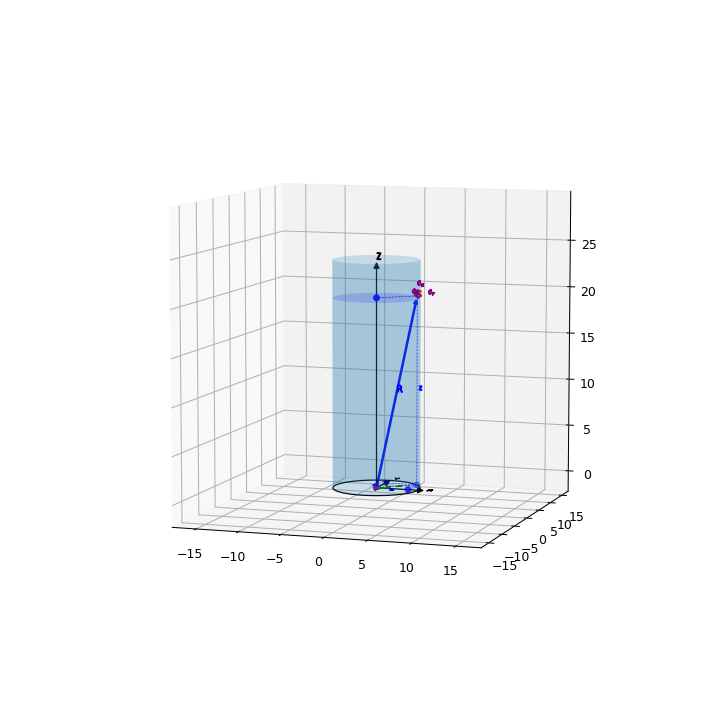

In [50]:
C.plot()